In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('result.csv')
df

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,duration_mins
0,0.9740,0.111,0.184,0.045600,8,0.1110,-15.011,27.0,0.0344,76.416,0.214,2.614450
1,0.6570,0.834,0.284,0.000002,3,0.0676,-13.497,32.0,0.1020,92.224,0.684,2.674450
2,0.8480,0.400,0.205,0.000000,7,0.4000,-11.794,1.0,0.0270,79.545,0.357,2.756000
3,0.7990,0.834,0.372,0.000000,1,0.2750,-11.990,40.0,0.0358,96.628,0.976,2.504450
4,0.8830,0.632,0.159,0.000000,8,0.2220,-14.056,35.0,0.0492,142.110,0.644,3.112217
...,...,...,...,...,...,...,...,...,...,...,...,...
9511,0.5270,0.451,0.462,0.000000,0,0.3030,-8.962,62.0,0.0782,89.174,0.533,3.306183
9512,0.0252,0.843,0.741,0.000000,11,0.0960,-5.609,89.0,0.3340,168.983,0.680,2.591617
9513,0.0212,0.680,0.826,0.000012,0,0.5430,-5.487,81.0,0.0309,118.051,0.644,3.593783
9514,0.0878,0.730,0.772,0.000000,5,0.4010,-3.883,75.0,0.3160,147.053,0.403,3.635050


                  acousticness  danceability    energy  instrumentalness  \
acousticness          1.000000     -0.232164 -0.591214         -0.015606   
danceability         -0.232164      1.000000  0.120989          0.025753   
energy               -0.591214      0.120989  1.000000          0.013530   
instrumentalness     -0.015606      0.025753  0.013530          1.000000   
key                  -0.008803      0.018271  0.012761          0.009119   
liveness             -0.010319     -0.108635  0.130367         -0.023792   
loudness             -0.393282      0.067248  0.691635         -0.115751   
popularity           -0.261673      0.139594  0.182244         -0.081350   
speechiness          -0.140061      0.264973  0.110643         -0.038795   
tempo                -0.116051     -0.179754  0.168290         -0.001560   
valence              -0.123871      0.407525  0.332122          0.056373   
duration_mins        -0.246546      0.052826  0.060893          0.079494   

           

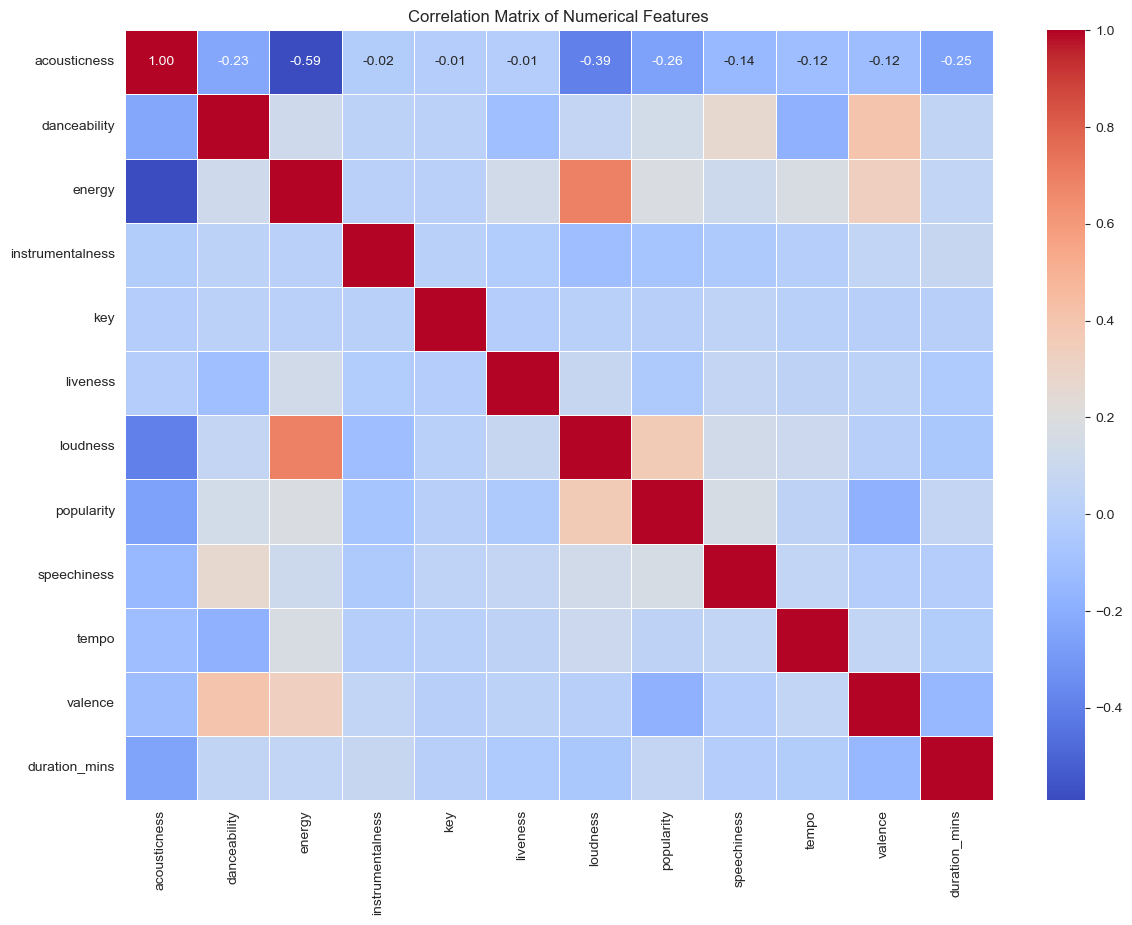

Correlation with Popularity:
 popularity          1.000000
loudness            0.362895
energy              0.182244
speechiness         0.160917
danceability        0.139594
duration_mins       0.062996
tempo               0.033162
key                 0.004561
liveness           -0.042254
instrumentalness   -0.081350
valence            -0.179310
acousticness       -0.261673
Name: popularity, dtype: float64


In [3]:
from matplotlib import pyplot as plt

correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(14, 10))

# seaborn 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
popularity_corr = correlation_matrix['popularity'].sort_values(ascending=False)
print("Correlation with Popularity:\n", popularity_corr)

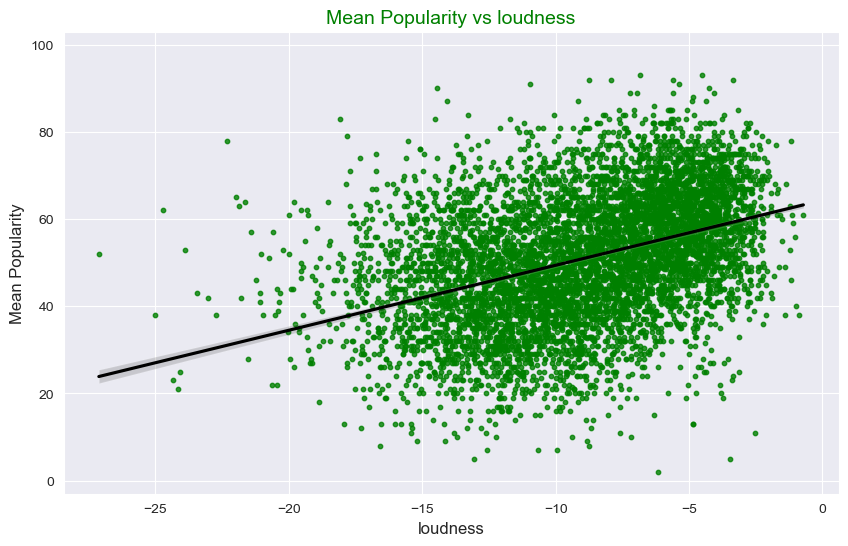

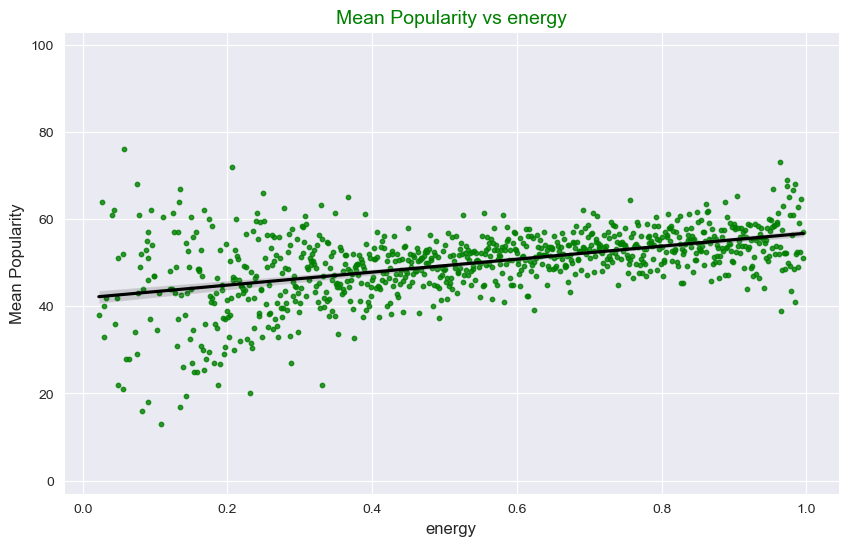

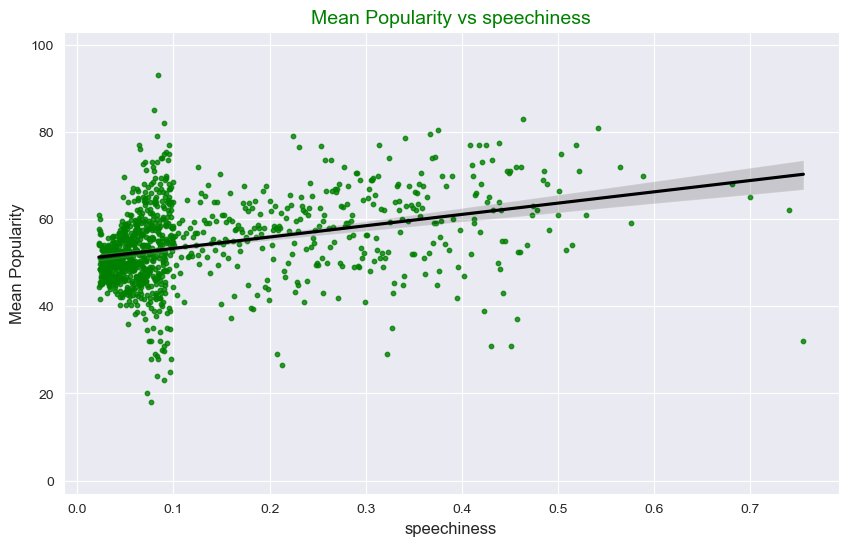

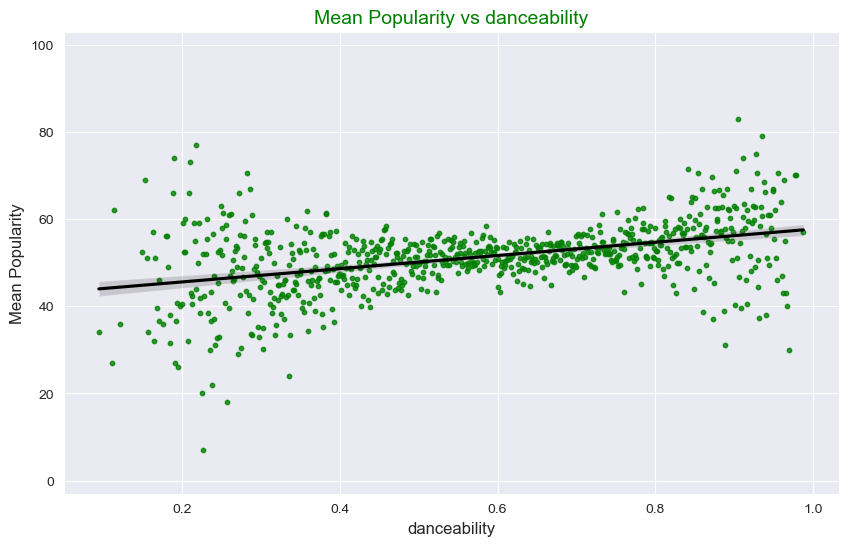

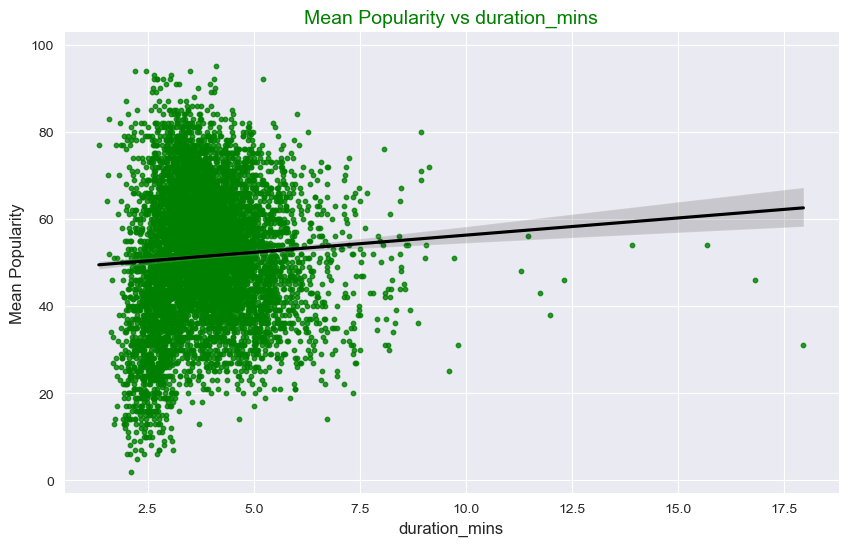

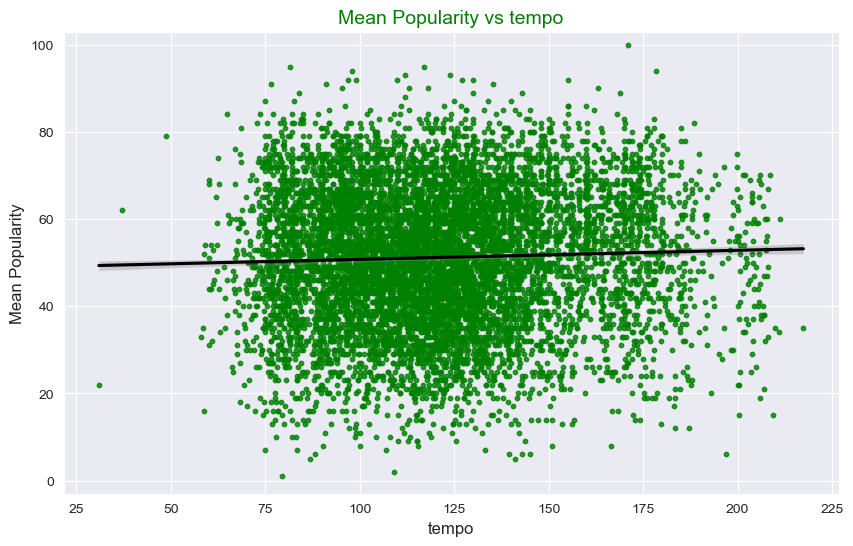

In [4]:
def regress_plot(x, y, data, xlab, ylab, titl):
    # Group data by x and calculate the mean of y
    data = data.groupby(x)[y].mean().reset_index()
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.regplot(x=x, y=y, data=data, scatter_kws={'color': 'g', "s": 10}, line_kws={'color': 'black'})
    plt.xlabel(xlab, fontsize=12)
    plt.ylabel(ylab, fontsize=12)
    plt.title(titl, fontsize=14, color='green')
    plt.ylim(-3, 103)
    plt.show()

features = ['loudness', 'energy', 'speechiness', 'danceability', 'duration_mins','tempo']

# Plotting each feature against popularity
for feature in features:
    regress_plot(
        x=feature,
        y='popularity',
        data=df,
        xlab=feature,
        ylab='Mean Popularity',
        titl=f'Mean Popularity vs {feature}'
    )


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


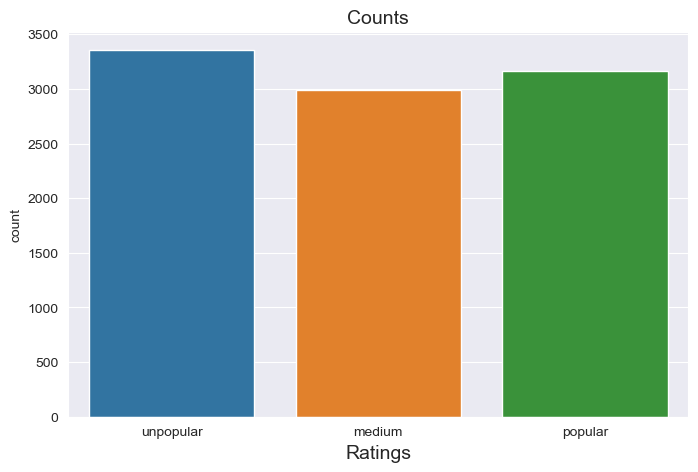

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is a pandas DataFrame that has been previously defined

# Discretize the 'popularity' column into three categories using qcut
df['popularity_level'] = pd.qcut(df['popularity'], q=3, labels=[0, 1, 2])

# Copy the dataframe and create a new column 'pop_rating'
classified = df.copy()
classified['pop_rating'] = classified['popularity_level'].map({0: 'unpopular', 1: 'medium', 2: 'popular'})

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
_ = sns.countplot(x='pop_rating', data=classified)
_ = plt.xlabel('Ratings', fontsize=14)
_ = plt.title('Counts', fontsize=14)
plt.show()
